# Import data

In [1]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm_notebook
from sklearn.metrics.pairwise import euclidean_distances


# Import the plotting library
import matplotlib.pyplot as plt
import seaborn as sns
 
# Import the yfinance. If you get module not found error the run !pip install yfiannce from your Jupyter notebook
import yfinance as yf  

[*********************100%***********************]  1 of 1 completed


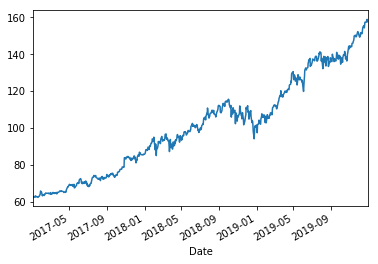

Time series length: 753
[*********************100%***********************]  1 of 1 completed


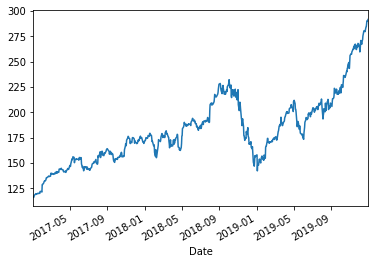

Time series length: 753


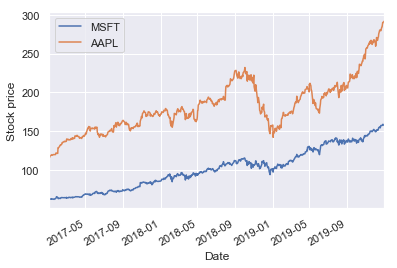

In [2]:
# Get the data of the stock MSFT
data_msft = yf.download(tickers='MSFT', start='2017-01-01', end='2019-12-31')
 
# Plot the close price of the MSFT
data_msft.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_msft)))

# Get the data of the stock AAPL
data_aapl = yf.download(tickers='AAPL', start='2017-01-01', end='2019-12-31')
 
# Plot the close price of the AAPL
data_aapl.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_aapl)))

# Plot the close price of both series
sns.set(font_scale = 1)
data_msft.Close.plot(label='MSFT')
data_aapl.Close.plot(label='AAPL')
plt.legend()
plt.ylabel('Stock price')
plt.savefig('msft_aapl_plot.png', dpi=200)
plt.show()

[*********************100%***********************]  1 of 1 completed


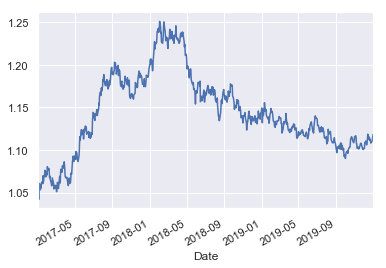

Time series length: 778
[*********************100%***********************]  1 of 1 completed


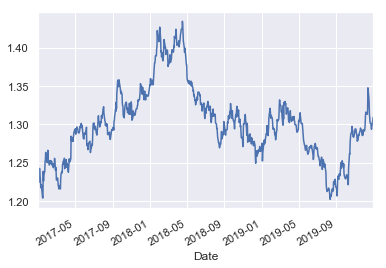

Time series length: 778


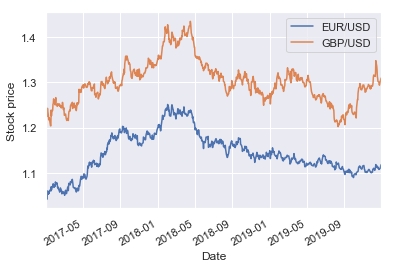

In [3]:
# Get the data of the stock EUR/USD
data_eur = yf.download(tickers='EURUSD=X', start='2017-01-01', end='2019-12-31')
 
# Plot the close price of the EUR/USD
data_eur.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_eur)))

# Get the data of the stock GBP/USD
data_gbp = yf.download(tickers='GBPUSD=X', start='2017-01-01', end='2019-12-31')
 
# Plot the close price of the GBP/USD
data_gbp.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_gbp)))

# Plot the close price of both series
sns.set(font_scale = 1)
data_eur.Close.plot(label='EUR/USD')
data_gbp.Close.plot(label='GBP/USD')
plt.legend()
plt.ylabel('Stock price')
plt.savefig('eur_gbp_plot.png', dpi=200)
plt.show()

[*********************100%***********************]  1 of 1 completed


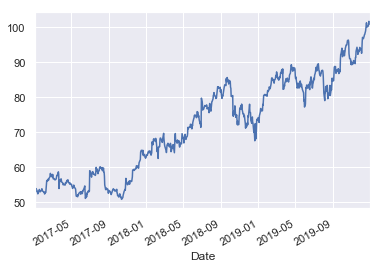

Time series length: 753
[*********************100%***********************]  1 of 1 completed


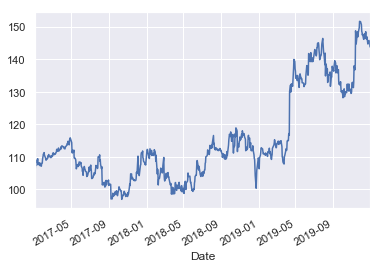

Time series length: 753


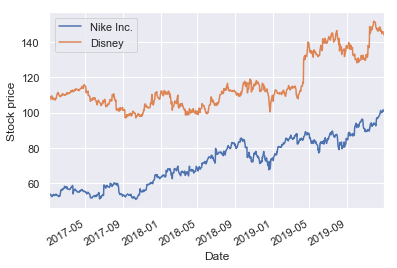

In [4]:
# Get the data of the stock Nike
data_nike = yf.download(tickers='NKE', start='2017-01-01', end='2019-12-31')

# Plot the close price of the Nike
data_nike.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_nike)))

# Get the data of the stock Disney
data_dis = yf.download(tickers='DIS', start='2017-01-01', end='2019-12-31')
 
# Plot the close price of the GBP/USD
data_dis.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_dis)))

# Plot the close price of both series
sns.set(font_scale = 1)
data_nike.Close.plot(label='Nike Inc.')
data_dis.Close.plot(label='Disney')
plt.legend()
plt.ylabel('Stock price')
plt.savefig('nike_disney_plot.png', dpi=200)
plt.show()

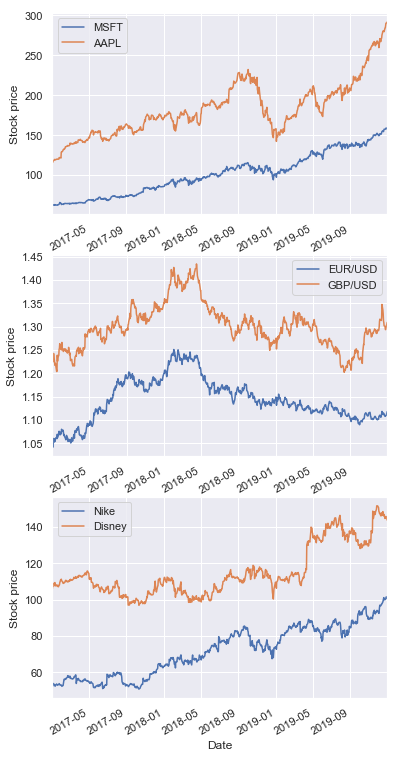

In [5]:
sns.set(font_scale = 1)

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(6,14))

fig1 = data_msft.Close.plot(label='MSFT', ax=ax[0])
fig1 = data_aapl.Close.plot(label='AAPL', ax=ax[0])
fig1.legend()

fig1 = data_eur.Close.plot(label='EUR/USD', ax=ax[1])
fig1 = data_gbp.Close.plot(label='GBP/USD', ax=ax[1])
fig1.legend()

fig1 = data_nike.Close.plot(label='Nike', ax=ax[2])
fig1 = data_dis.Close.plot(label='Disney', ax=ax[2])
fig1.legend()

ax[0].set_ylabel('Stock price')
ax[1].set_ylabel('Stock price')
ax[2].set_ylabel('Stock price')
plt.savefig('line_plots.png', dpi=200)
plt.show()

# Data analysis

In [6]:
# Merge stocks that are gonna be compared
data_1 = pd.merge(left=data_msft[['Close']],
                       right=data_aapl[['Close']],
                       left_index=True,
                       right_index=True,
                       how='left')
data_1.columns = ['MSFT', 'AAPL']

data_2 = pd.merge(left=data_eur[['Close']],
                       right=data_gbp[['Close']],
                       left_index=True,
                       right_index=True,
                       how='left')
data_2.columns = ['EUR/USD', 'GBP/USD']

data_3 = pd.merge(left=data_nike[['Close']],
                       right=data_dis[['Close']],
                       left_index=True,
                       right_index=True,
                       how='left')
data_3.columns = ['Nike', 'Disney']

# Descriptive statistics
print(data_1.describe(), '\n',
      data_2.describe(), '\n',
      data_3.describe())

             MSFT        AAPL
count  753.000000  753.000000
mean   101.097065  182.506746
std     26.024495   34.221945
min     62.299999  116.019997
25%     75.209999  156.389999
50%    101.120003  175.850006
75%    119.279999  203.860001
max    158.960007  291.519989 
           EUR/USD     GBP/USD
count  778.000000  778.000000
mean     1.143614    1.300282
std      0.046032    0.047744
min      1.041992    1.202198
25%      1.113707    1.269950
50%      1.137475    1.296554
75%      1.175195    1.323381
max      1.251001    1.434206 
              Nike      Disney
count  753.000000  753.000000
mean    71.773373  115.151501
std     13.652446   13.929843
min     50.830002   96.930000
25%     57.799999  105.260002
50%     72.750000  110.970001
75%     83.470001  117.120003
max    101.570000  151.639999


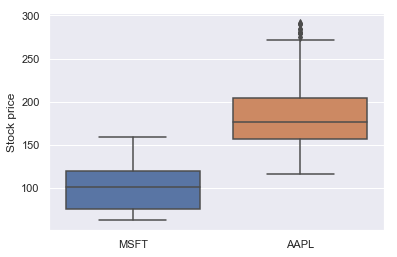

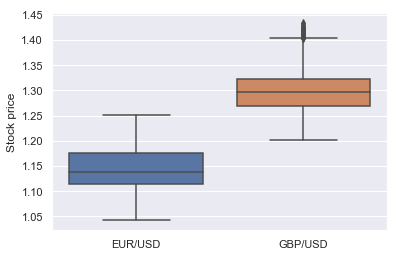

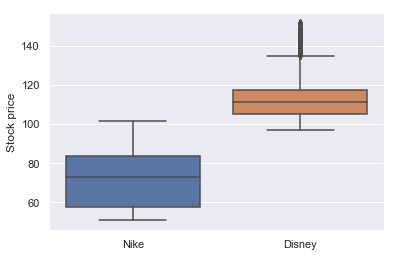

In [7]:
# Boxplot of the stocks
sns.boxplot(data=data_1)
plt.ylabel('Stock price')
plt.savefig('msft_aapl_boxplot.png', dpi=200)
plt.show()

sns.boxplot(data=data_2)
plt.ylabel('Stock price')
plt.savefig('eur_gbp_boxplot.png', dpi=200)
plt.show()

sns.boxplot(data=data_3)
plt.ylabel('Stock price')
plt.savefig('nike_disney_boxplot.png', dpi=200)
plt.show()

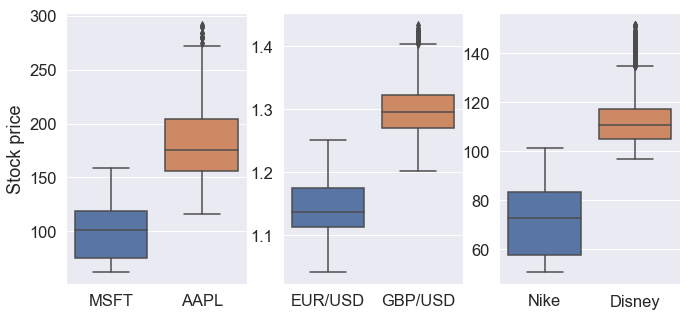

In [8]:
sns.set(font_scale = 1.5)

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(11,5))

sns.boxplot(data=data_1, ax=ax[0])
sns.boxplot(data=data_2, ax=ax[1])
sns.boxplot(data=data_3, ax=ax[2])

ax[0].set_ylabel('Stock price')
plt.savefig('boxplots.png', dpi=200)
plt.show()

In [ ]:
aapl = np.array(data_aapl['Close'], dtype=np.float)
msft = np.array(data_msft['Close'], dtype=np.float)

In [ ]:
euclidean_dist = np.linalg.norm(aapl[0]-msft[0])

In [ ]:
euclidean_dist

In [ ]:
def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [ ]:
%%time
a = [1, 2, 3]
b = [2, 2, 2, 3, 4]

dtw_distance = dtw(a, b, window=2)
print(dtw_distance)

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

a = np.array([1, 2, 3])
b = np.array([2, 2, 2, 3, 4])

distance, path = fastdtw(a, b, dist=euclidean)

print(distance)
print(path)

In [ ]:
%%time
distance, path = fastdtw(aapl, msft, radius=10, dist=euclidean)
print(distance)

In [ ]:
%%time
lst = []
for i in range(0, len(aapl)):
    dist = euclidean(aapl[i], msft[i])
    lst.append(dist)
    result = sum(lst)

In [ ]:
result/len(lst)

In [ ]:
?fastdtw

## Try out